In [40]:
%pylab inline

from itertools import islice
import pandas as pd

train_set = pd.read_csv('data/competition_data/train_set.csv')
train_set[:5]

Populating the interactive namespace from numpy and matplotlib


,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [2]:
train_set['cost'].describe()

count    30213.000000
mean        13.433317
std         28.663200
min          0.503553
25%          3.878190
50%          6.521146
75%         13.431781
max       1000.000000
Name: cost, dtype: float64

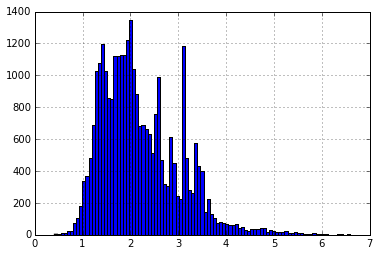

In [3]:
np.log(train_set['cost'] + 1).hist(bins=100)

In [4]:
train_set['cost'].mean()

13.433317317442084

In [5]:
train_set['supplier'].describe()

count      30213
unique        57
top       S-0066
freq       20553
Name: supplier, dtype: object

In [6]:
train_set['supplier'].value_counts()

S-0066    20553
S-0041     3323
S-0072     2317
S-0054      838
S-0026      727
S-0013      554
S-0058      516
S-0064      446
S-0062      264
S-0014      139
S-0030      111
S-0104       90
S-0081       64
S-0105       33
S-0005       24
S-0031       21
S-0027       20
S-0042       19
S-0070       18
S-0043       14
S-0018       10
S-0080       10
S-0092       10
S-0056        9
S-0008        7
S-0074        5
S-0007        5
S-0050        5
S-0015        5
S-0011        5
S-0009        4
S-0023        4
S-0059        4
S-0025        3
S-0097        3
S-0060        3
S-0090        3
S-0111        2
S-0078        2
S-0087        2
S-0046        2
S-0107        2
S-0061        2
S-0096        2
S-0068        1
S-0109        1
S-0108        1
S-0051        1
S-0106        1
S-0022        1
S-0024        1
S-0012        1
S-0003        1
S-0006        1
S-0004        1
S-0095        1
S-0029        1
dtype: int64

In [41]:
tube_df = pd.read_csv('data/competition_data/tube.csv')
tube_df[:5]

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [26]:
tube_df['material_id'].value_counts()

SP-0029    11488
SP-0035     3676
SP-0028     1644
SP-0039      970
SP-0019      926
SP-0046      892
SP-0037      632
SP-0038      207
SP-0033      155
SP-0008      102
SP-0041       76
SP-0048       67
SP-0044       24
SP-0030       24
SP-0034       13
SP-0036       12
SP-0032        9
SP-0045        1
SP-0031        1
dtype: int64

In [32]:
train_set_ext = pd.merge(train_set, tube_df, on='tube_assembly_id')
train_set_ext[1000:1010]

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,material_id,diameter,...,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
1000,TA-00500,S-0066,2013-09-01,0,0,Yes,25,5.208015,SP-0029,15.88,...,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1001,TA-00500,S-0066,2013-09-01,0,0,Yes,50,4.799052,SP-0029,15.88,...,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1002,TA-00500,S-0066,2013-09-01,0,0,Yes,100,4.612654,SP-0029,15.88,...,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1003,TA-00500,S-0066,2013-09-01,0,0,Yes,250,4.501372,SP-0029,15.88,...,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1004,TA-00501,S-0072,2011-04-29,100,1,Yes,1,2.119929,SP-0035,15.88,...,31.75,N,N,N,N,EF-018,EF-018,0,0,0
1005,TA-00501,S-0072,2011-06-01,734,1,Yes,1,1.491184,SP-0035,15.88,...,31.75,N,N,N,N,EF-018,EF-018,0,0,0
1006,TA-00503,S-0072,2014-05-21,40,1,Yes,1,12.152034,SP-0035,15.88,...,31.75,N,N,N,N,EF-018,EF-018,0,0,0
1007,TA-00506,S-0072,2011-05-16,100,1,Yes,1,3.444189,SP-0035,12.70,...,19.05,N,N,N,N,EF-018,EF-018,0,0,0
1008,TA-00506,S-0072,2014-05-21,900,46,Yes,1,2.487161,SP-0035,12.70,...,19.05,N,N,N,N,EF-018,EF-018,0,0,0
1009,TA-00506,S-0072,2014-07-01,900,1,Yes,1,2.834918,SP-0035,12.70,...,19.05,N,N,N,N,EF-018,EF-018,0,0,0


In [36]:
df = pd.DataFrame({'a': [1, 2, 3], 'b': [10, 20, 30]})
df

,a,b
0,1,10
1,2,20
2,3,30


In [38]:
set(df['a'])

{1, 2, 3}

In [43]:
train_set_ext[train_set['tube_assembly_id'] == 'TA-00034']

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,material_id,diameter,...,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
68,TA-00034,S-0062,2014-08-07,50,0,Yes,1,94.025250,SP-0028,25.4,...,50.8,N,N,N,N,EF-003,EF-009,0,0,0
69,TA-00034,S-0062,1993-02-02,280,1,Yes,1,4.829655,SP-0028,25.4,...,50.8,N,N,N,N,EF-003,EF-009,0,0,0
70,TA-00034,S-0062,2014-08-07,50,0,Yes,6,22.662653,SP-0028,25.4,...,50.8,N,N,N,N,EF-003,EF-009,0,0,0
71,TA-00034,S-0062,2014-08-07,50,0,Yes,10,16.953868,SP-0028,25.4,...,50.8,N,N,N,N,EF-003,EF-009,0,0,0
72,TA-00034,S-0062,2014-08-07,50,0,Yes,20,11.676302,SP-0028,25.4,...,50.8,N,N,N,N,EF-003,EF-009,0,0,0
73,TA-00034,S-0062,2014-08-07,50,0,Yes,50,8.969358,SP-0028,25.4,...,50.8,N,N,N,N,EF-003,EF-009,0,0,0


In [53]:
tube_df[tube_df['tube_assembly_id'] == 'TA-00034']['diameter'].values

array([ 25.4])

In [46]:
train_set_ext[train_set['tube_assembly_id'] == 'TA-00034']['diameter'].unique()

array([ 25.4])

In [9]:
specs_df = pd.read_csv('data/competition_data/specs.csv')
specs_df[10:15]

,tube_assembly_id,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
10,TA-00011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,TA-00012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,TA-00013,SP-0004,SP-0069,SP-0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,TA-00014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,TA-00015,SP-0063,SP-0069,SP-0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
bill_df = pd.read_csv('data/competition_data/bill_of_materials.csv')
bill_df[:5]

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2,C-1629,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1,C-1631,1,C-1641,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
tube_df[tube_df.bend_radius == 9999]

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
15132,TA-15133,SP-0029,31.75,1.65,49,2,9999,N,N,N,N,EF-003,EF-003,0,0,0
15174,TA-15175,SP-0029,31.75,1.65,36,1,9999,N,N,N,N,EF-003,EF-003,0,0,0
15175,TA-15176,SP-0029,31.75,1.65,76,1,9999,N,N,N,N,EF-003,EF-003,0,0,0
17688,TA-17689,SP-0046,66.70,7.90,88,2,9999,N,Y,N,N,NONE,NONE,0,0,0
17689,TA-17690,SP-0046,66.70,7.90,71,2,9999,N,Y,N,N,NONE,NONE,0,0,0
18002,TA-18003,SP-0046,66.70,7.90,63,2,9999,N,Y,N,Y,NONE,NONE,0,0,0
18003,TA-18004,SP-0046,66.70,7.90,81,2,9999,N,Y,N,N,NONE,NONE,0,0,0
19320,TA-19321,SP-0019,6.35,0.71,32,3,9999,N,N,N,N,EF-008,EF-008,0,0,0


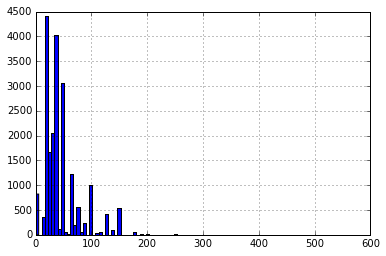

In [51]:
tube_df[tube_df.bend_radius < 9999].bend_radius.hist(bins=100)

In [49]:
tube_df.bend_radius.describe()

count    21198.000000
mean        49.350767
std        196.468480
min          0.000000
25%         19.050000
50%         38.100000
75%         50.800000
max       9999.000000
Name: bend_radius, dtype: float64